<a href="https://colab.research.google.com/github/MK2709/DS11-assigments/blob/main/DAwPy_Capstone_Project_(AutoScout)_Part1(DataCleaning)_D1461_Metin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 `( Data Cleaning )`

In [144]:
pip install skimpy --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [844]:
df = pd.read_json('scout_car.json', lines=True)


In [845]:
df_yedek=df.copy()
#creating a copy of a raw data-set just incase

In [846]:
df.head(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [847]:
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,None,1 previous owner
kW,NaN,NaN,NaN


In [848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [849]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [850]:
#correcting column names
df=clean_columns(df)
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'k_w', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='object')

In [851]:
df.columns=['URL', 'Make_Model', 'Short_Description', 'Body_Type', 'Price', 'Vat',
       'Km', 'Registration', 'Prev_Owner', 'k_w', 'hp', 'type',
       'Previous_Owners', 'Next_inspection', 'Inspection_new', 'Warranty',
       'Full_Service', 'Non_Smoking_Vehicle', 'Null', 'Make', 'Model',
       'Offer_Number', 'First_Registration', 'Body_Color', 'Paint_Type',
       'Body_Color_Original', 'Upholstery', 'Body', 'Nr_of_Doors',
       'Nr_of_Seats', 'Model_Code', 'Gearing_Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive_Chain', 'Fuel', 'Consumption',
       'Co_2_Emission', 'Emission_Class', 'Comfort_&_Convenience',
       'Entertainment_&_Media', 'Extras', 'Safety_&_Security', 'Description',
       'Emission_Label', 'Gears', 'Country_Version', 'Electricity_Consumption',
       'Last_Service_Date', 'Other_Fuel_Types', 'Availability',
       'Last_Timing_Belt_Service_Date', 'Available_From']

In [852]:
df.head(3).T

,0,1,2
URL,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
Make_Model,Audi A1,Audi A1,Audi A1
Short_Description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,"56,013 km","80,000 km","83,450 km"
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
k_w,NaN,NaN,NaN


In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   URL                            15919 non-null  object 
 1   Make_Model                     15919 non-null  object 
 2   Short_Description              15873 non-null  object 
 3   Body_Type                      15859 non-null  object 
 4   Price                          15919 non-null  int64  
 5   Vat                            11406 non-null  object 
 6   Km                             15919 non-null  object 
 7   Registration                   15919 non-null  object 
 8   Prev_Owner                     9091 non-null   object 
 9   k_w                            0 non-null      float64
 10  hp                             15919 non-null  object 
 11  type                           15917 non-null  object 
 12  Previous_Owners                9279 non-null  

In [854]:
df.shape

(15919, 54)

In [855]:
df.isnull().sum()

URL                                  0
Make_Model                           0
Short_Description                   46
Body_Type                           60
Price                                0
Vat                               4513
Km                                   0
Registration                         0
Prev_Owner                        6828
k_w                              15919
hp                                   0
type                                 2
Previous_Owners                   6640
Next_inspection                  12384
Inspection_new                   11987
Warranty                          5420
Full_Service                      7704
Non_Smoking_Vehicle               8742
Null                                 0
Make                                 0
Model                                0
Offer_Number                      3175
First_Registration                1597
Body_Color                         597
Paint_Type                        5772
Body_Color_Original      

In [856]:
df.shape
df.shape[0]

15919

In [857]:
df.isnull().sum()*100/df.shape[0]
#find the percentage of null values

URL                               0.00
Make_Model                        0.00
Short_Description                 0.29
Body_Type                         0.38
Price                             0.00
Vat                              28.35
Km                                0.00
Registration                      0.00
Prev_Owner                       42.89
k_w                             100.00
hp                                0.00
type                              0.01
Previous_Owners                  41.71
Next_inspection                  77.79
Inspection_new                   75.30
Warranty                         34.05
Full_Service                     48.39
Non_Smoking_Vehicle              54.92
Null                              0.00
Make                              0.00
Model                             0.00
Offer_Number                     19.94
First_Registration               10.03
Body_Color                        3.75
Paint_Type                       36.26
Body_Color_Original      

In [858]:
missing_values = df.isnull().sum()*100 / df.shape[0]
missing_values

URL                               0.00
Make_Model                        0.00
Short_Description                 0.29
Body_Type                         0.38
Price                             0.00
Vat                              28.35
Km                                0.00
Registration                      0.00
Prev_Owner                       42.89
k_w                             100.00
hp                                0.00
type                              0.01
Previous_Owners                  41.71
Next_inspection                  77.79
Inspection_new                   75.30
Warranty                         34.05
Full_Service                     48.39
Non_Smoking_Vehicle              54.92
Null                              0.00
Make                              0.00
Model                             0.00
Offer_Number                     19.94
First_Registration               10.03
Body_Color                        3.75
Paint_Type                       36.26
Body_Color_Original      

In [859]:
def df_nans(df, limit):
    missing_values = df.isnull().sum()*100 / df.shape[0]
    return missing_values.loc[lambda x : x >= limit]

In [860]:
df_nans(df,90)

k_w                             100.00
Electricity_Consumption          99.14
Last_Service_Date                96.44
Other_Fuel_Types                 94.47
Availability                     96.01
Last_Timing_Belt_Service_Date    99.90
Available_From                   98.29
dtype: float64

In [861]:
df_nans(df,70)

k_w                             100.00
Next_inspection                  77.79
Inspection_new                   75.30
Emission_Label                   74.97
Electricity_Consumption          99.14
Last_Service_Date                96.44
Other_Fuel_Types                 94.47
Availability                     96.01
Last_Timing_Belt_Service_Date    99.90
Available_From                   98.29
dtype: float64

In [862]:
df["Emission_Label"]

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission_Label, Length: 15919, dtype: object

In [863]:
df["Emission_Label"].isnull().sum()*100/df["Emission_Label"].shape[0]
df["Emission_Label"].isnull().sum()*100/df.shape[0]
#df["Emission_Label"].shape
#df.shape[0]

74.9670205414913

In [864]:
def column_nan(column_name):
  return column_name.isnull().sum()*100/column_name.shape[0]

In [865]:
column_nan(df["Emission_Label"])

74.9670205414913

In [866]:
df_nans(df,90)
df_nans(df,90).index

Index(['k_w', 'Electricity_Consumption', 'Last_Service_Date',
       'Other_Fuel_Types', 'Availability', 'Last_Timing_Belt_Service_Date',
       'Available_From'],
      dtype='object')

Let's Drop the Columns contain 90% missing values.

In [867]:
dropping_columns=df_nans(df,90).index
dropping_columns

Index(['k_w', 'Electricity_Consumption', 'Last_Service_Date',
       'Other_Fuel_Types', 'Availability', 'Last_Timing_Belt_Service_Date',
       'Available_From'],
      dtype='object')

In [868]:
df.drop(dropping_columns,axis=1, inplace=True)


In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   URL                    15919 non-null  object
 1   Make_Model             15919 non-null  object
 2   Short_Description      15873 non-null  object
 3   Body_Type              15859 non-null  object
 4   Price                  15919 non-null  int64 
 5   Vat                    11406 non-null  object
 6   Km                     15919 non-null  object
 7   Registration           15919 non-null  object
 8   Prev_Owner             9091 non-null   object
 9   hp                     15919 non-null  object
 10  type                   15917 non-null  object
 11  Previous_Owners        9279 non-null   object
 12  Next_inspection        3535 non-null   object
 13  Inspection_new         3932 non-null   object
 14  Warranty               10499 non-null  object
 15  Full_Service       

In [870]:
df.head(3).T

,0,1,2
URL,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
Make_Model,Audi A1,Audi A1,Audi A1
Short_Description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,"56,013 km","80,000 km","83,450 km"
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW


We should drop "Null" column as well..

In [871]:
df.drop("Null",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   URL                    15919 non-null  object
 1   Make_Model             15919 non-null  object
 2   Short_Description      15873 non-null  object
 3   Body_Type              15859 non-null  object
 4   Price                  15919 non-null  int64 
 5   Vat                    11406 non-null  object
 6   Km                     15919 non-null  object
 7   Registration           15919 non-null  object
 8   Prev_Owner             9091 non-null   object
 9   hp                     15919 non-null  object
 10  type                   15917 non-null  object
 11  Previous_Owners        9279 non-null   object
 12  Next_inspection        3535 non-null   object
 13  Inspection_new         3932 non-null   object
 14  Warranty               10499 non-null  object
 15  Full_Service       

# Analyze Columns 1by1

URL
This column has only url adress so we might as well drop it. 

In [872]:
df.URL.value_counts()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [873]:
df.drop("URL",axis=1,inplace=True)

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make_Model             15919 non-null  object
 1   Short_Description      15873 non-null  object
 2   Body_Type              15859 non-null  object
 3   Price                  15919 non-null  int64 
 4   Vat                    11406 non-null  object
 5   Km                     15919 non-null  object
 6   Registration           15919 non-null  object
 7   Prev_Owner             9091 non-null   object
 8   hp                     15919 non-null  object
 9   type                   15917 non-null  object
 10  Previous_Owners        9279 non-null   object
 11  Next_inspection        3535 non-null   object
 12  Inspection_new         3932 non-null   object
 13  Warranty               10499 non-null  object
 14  Full_Service           8215 non-null   object
 15  Non_Smoking_Vehicle

Make_Model

In [875]:
df["Make_Model"]
df.Make_Model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: Make_Model, dtype: int64

## Make

In [876]:
df["Make"]
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [877]:
df["Make"]=df.Make.str.strip('\n')
df["Make"]

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: Make, Length: 15919, dtype: object

In [878]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## Model

In [879]:
df["Model"]
#data type object not int

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, Length: 15919, dtype: object

In [880]:
df["Model"][0]
df["Model"][0][1]

'A1'

In [881]:
df.head(3).T

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Short_Description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,"56,013 km","80,000 km","83,450 km"
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"


In [882]:
df["Model"].apply(lambda x: x[1])

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [883]:
df.Model.str[1]

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object

In [884]:
df["Model"]=df.Model.str[1]

In [885]:
df.Model.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

I decided to keep "Make&Model" column and drop "Make" and "Model" columns .. 

In [886]:
df.drop(["Make","Model"], axis=1, inplace=True)

## short_description & description

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make_Model             15919 non-null  object
 1   Short_Description      15873 non-null  object
 2   Body_Type              15859 non-null  object
 3   Price                  15919 non-null  int64 
 4   Vat                    11406 non-null  object
 5   Km                     15919 non-null  object
 6   Registration           15919 non-null  object
 7   Prev_Owner             9091 non-null   object
 8   hp                     15919 non-null  object
 9   type                   15917 non-null  object
 10  Previous_Owners        9279 non-null   object
 11  Next_inspection        3535 non-null   object
 12  Inspection_new         3932 non-null   object
 13  Warranty               10499 non-null  object
 14  Full_Service           8215 non-null   object
 15  Non_Smoking_Vehicle

In [888]:
df.head(3)

,Make_Model,Short_Description,Body_Type,Price,Vat,Km,Registration,Prev_Owner,hp,type,Previous_Owners,Next_inspection,Inspection_new,Warranty,Full_Service,Non_Smoking_Vehicle,Offer_Number,First_Registration,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Body,Nr_of_Doors,Nr_of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_Chain,Fuel,Consumption,Co_2_Emission,Emission_Class,Comfort_&_Convenience,Entertainment_&_Media,Extras,Safety_&_Security,Description,Emission_Label,Gears,Country_Version
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN


In [889]:
df.Short_Description.value_counts(dropna=False)
#we can obtaiın tese informations from other columns

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: Short_Description, Length: 10002, dtype: int64

In [890]:
df['Description'].astype('str').value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [891]:
df["Description"]
#Description in German so its not useful

0        [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1        [\nLangstreckenfahrzeug daher die hohe Kilomet...
2        [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3        [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4        [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
                               ...                        
15914    [\nVettura visionabile nella sede in Via Roma ...
15915    [\nDach: Panorama-Glas-Schiebedach, Lackierung...
15916    [\n, Getriebe:,  Automatik, Technik:,  Bordcom...
15917    [\nDEK:[2691331], Renault Espace Blue dCi 200C...
15918    [\n, Sicherheit Airbags:,  , Seitenairbag,  , ...
Name: Description, Length: 15919, dtype: object

In [892]:
df.drop(["Short_Description","Description"], axis=1, inplace=True)

In [893]:
df.head(5)

,Make_Model,Body_Type,Price,Vat,Km,Registration,Prev_Owner,hp,type,Previous_Owners,Next_inspection,Inspection_new,Warranty,Full_Service,Non_Smoking_Vehicle,Offer_Number,First_Registration,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Body,Nr_of_Doors,Nr_of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_Chain,Fuel,Consumption,Co_2_Emission,Emission_Class,Comfort_&_Convenience,Entertainment_&_Media,Extras,Safety_&_Security,Emission_Label,Gears,Country_Version
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN
1,Audi A1,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],NaN
2,Audi A1,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,NaN
3,Audi A1,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],NaN
4,Audi A1,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nC1626\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Make_Model             15919 non-null  object
 1   Body_Type              15859 non-null  object
 2   Price                  15919 non-null  int64 
 3   Vat                    11406 non-null  object
 4   Km                     15919 non-null  object
 5   Registration           15919 non-null  object
 6   Prev_Owner             9091 non-null   object
 7   hp                     15919 non-null  object
 8   type                   15917 non-null  object
 9   Previous_Owners        9279 non-null   object
 10  Next_inspection        3535 non-null   object
 11  Inspection_new         3932 non-null   object
 12  Warranty               10499 non-null  object
 13  Full_Service           8215 non-null   object
 14  Non_Smoking_Vehicle    7177 non-null   object
 15  Offer_Number       

## Body&Body_Type

In [895]:
df.Body_Type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64

In [896]:
df["Body"]

0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object

In [897]:
df.Body.astype("str").value_counts()

['\n', 'Sedans', '\n']           7903
['\n', 'Station wagon', '\n']    3553
['\n', 'Compact', '\n']          3153
['\n', 'Van', '\n']               783
['\n', 'Other', '\n']             290
['\n', 'Transporter', '\n']        88
nan                                60
['\n', 'Off-Road', '\n']           56
['\n', 'Coupe', '\n']              25
['\n', 'Convertible', '\n']         8
Name: Body, dtype: int64

In [898]:
df["Body"]=df.Body.str[1]
df.Body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

## Since both "Body" and "Body_Type" are same, we drop Body..

In [899]:
df.drop("Body",axis=1, inplace=True)

In [900]:
df.head(3).T

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,"56,013 km","80,000 km","83,450 km"
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous_Owners,\n2\n,NaN,\n1\n


##Price(Target Columns)

In [901]:
df.Price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: Price, Length: 2956, dtype: int64

In [902]:
df["Price"]

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: Price, Length: 15919, dtype: int64

In [903]:
df

,Make_Model,Body_Type,Price,Vat,Km,Registration,Prev_Owner,hp,type,Previous_Owners,Next_inspection,Inspection_new,Warranty,Full_Service,Non_Smoking_Vehicle,Offer_Number,First_Registration,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Nr_of_Doors,Nr_of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_Chain,Fuel,Consumption,Co_2_Emission,Emission_Class,Comfort_&_Convenience,Entertainment_&_Media,Extras,Safety_&_Security,Emission_Label,Gears,Country_Version
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN
1,Audi A1,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n4 (Green)\n],[\n7\n],NaN
2,Audi A1,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",[\n4 (Green)\n],NaN,NaN
3,Audi A1,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,[\n6\n],NaN
4,Audi A1,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[\nC1626\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Spo

In [904]:
df.Price.isnull().sum()
#there is no car for Free.. :)

0

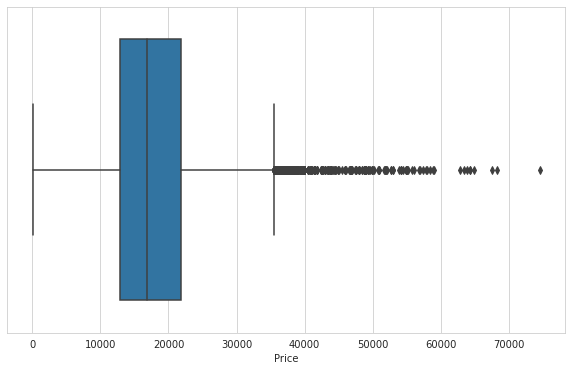

In [905]:
sns.boxplot(df.Price);
## we can get an insight for outliars

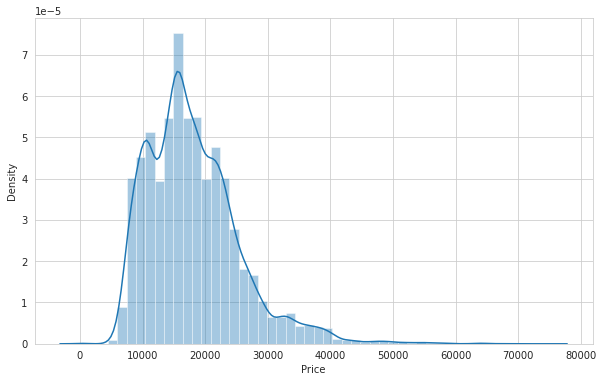

In [906]:
sns.distplot(df.Price);

In [907]:
Price_2=df.sort_values('Price', axis=0, ascending=True)
Price_2["Price"]
#but there is couple for low-low...;)

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: Price, Length: 15919, dtype: int64

## Vat (Value Added Tax)

In [908]:
df.head(3).T

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,"56,013 km","80,000 km","83,450 km"
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous_Owners,\n2\n,NaN,\n1\n


In [909]:
df.Vat.value_counts(dropna=False)
#As you can see most of them are deductable

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: Vat, dtype: int64

## Km

In [910]:
df["Km"]

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: Km, Length: 15919, dtype: object

In [911]:
df.Km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: Km, Length: 6690, dtype: int64

In [912]:
df.Km.str.replace(",","")

0        56013 km
1        80000 km
2        83450 km
3        73000 km
4        16200 km
           ...   
15914        - km
15915     9900 km
15916       15 km
15917       10 km
15918        - km
Name: Km, Length: 15919, dtype: object

In [913]:
df.Km.str.replace(",","").str.extract('(\d{1,6})')

,0
0,56013
1,80000
2,83450
3,73000
4,16200
...,...
15914,NaN
15915,9900
15916,15
15917,10


In [914]:
#Solution 1
df.Km.str.replace(",","").str.extract('(\d{1,6})').astype(float)

,0
0,56013.00
1,80000.00
2,83450.00
3,73000.00
4,16200.00
...,...
15914,NaN
15915,9900.00
15916,15.00
15917,10.00


In [915]:
#Solution 2
df.Km.str.replace(',', '').str.rstrip(" km").replace('-', np.nan).astype('float')

0       56013.00
1       80000.00
2       83450.00
3       73000.00
4       16200.00
          ...   
15914        NaN
15915    9900.00
15916      15.00
15917      10.00
15918        NaN
Name: Km, Length: 15919, dtype: float64

In [916]:
#We have to remove "," from km 
df["Km"]=df.Km.str.replace(",","").str.extract('(\d{1,6})').astype(float)


In [917]:
df["Km"]

0       56013.00
1       80000.00
2       83450.00
3       73000.00
4       16200.00
          ...   
15914        NaN
15915    9900.00
15916      15.00
15917      10.00
15918        NaN
Name: Km, Length: 15919, dtype: float64

In [918]:
df.Km.value_counts(dropna=False)
#Attention. There are 1024 NaN values..

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: Km, Length: 6690, dtype: int64

#Registeration&First Registeration

In [919]:
df.head(3).T
#Registeration contains month value whereas first registreation contains only year

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,56013.00,80000.00,83450.00
Registration,01/2016,03/2017,02/2016
Prev_Owner,2 previous owners,None,1 previous owner
hp,66 kW,141 kW,85 kW
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous_Owners,\n2\n,NaN,\n1\n


In [920]:
df.Registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: Registration, dtype: int64

In [921]:
df["First_Registration"]

0        [\n, 2016, \n]
1        [\n, 2017, \n]
2        [\n, 2016, \n]
3        [\n, 2016, \n]
4        [\n, 2016, \n]
              ...      
15914               NaN
15915    [\n, 2019, \n]
15916    [\n, 2019, \n]
15917    [\n, 2019, \n]
15918    [\n, 2019, \n]
Name: First_Registration, Length: 15919, dtype: object

In [922]:
df.First_Registration.astype("str").value_counts()

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: First_Registration, dtype: int64

In [923]:
df["First_Registration"]=df.First_Registration.str[1].astype(float)

In [924]:
## we'd better use First_Registration because it comes only in years 
df.First_Registration.value_counts(dropna=False)


2018.00    4522
2016.00    3674
2017.00    3273
2019.00    2853
NaN        1597
Name: First_Registration, dtype: int64

Since this data was scraped from the on-line car trading company in 2019 we should substract a year from 2019 to find the age of the car.

In [925]:
df["Age"]=2019-df["First_Registration"]
df["Age"]

0       3.00
1       2.00
2       3.00
3       3.00
4       3.00
        ... 
15914    NaN
15915   0.00
15916   0.00
15917   0.00
15918   0.00
Name: Age, Length: 15919, dtype: float64

In [926]:
df.Age.value_counts(dropna=False)

1.00    4522
3.00    3674
2.00    3273
0.00    2853
NaN     1597
Name: Age, dtype: int64

In [927]:
#now we drop First_Registration and Registration Columns

df.drop(["Registration","First_Registration"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Prev_Owner             9091 non-null   object 
 6   hp                     15919 non-null  object 
 7   type                   15917 non-null  object 
 8   Previous_Owners        9279 non-null   object 
 9   Next_inspection        3535 non-null   object 
 10  Inspection_new         3932 non-null   object 
 11  Warranty               10499 non-null  object 
 12  Full_Service           8215 non-null   object 
 13  Non_Smoking_Vehicle    7177 non-null   object 
 14  Offer_Number           12744 non-null  object 
 15  Bo

## prev_owner & Previous Owners

In [928]:
df["Prev_Owner"]
#object

0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: Prev_Owner, Length: 15919, dtype: object

In [929]:
df.Prev_Owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: Prev_Owner, dtype: int64

In [930]:
df["Previous_Owners"]
#object & list

0                                                    \n2\n
1                                                      NaN
2                                                    \n1\n
3                                                    \n1\n
4                                                    \n1\n
                               ...                        
15914                                                  NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...
15916                     [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                  NaN
15918                                                \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [931]:
df["Previous_Owners"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/


I prefer "Previous Owners" column because it has less NaN values. But before dropping "prev_owner", I'll fill "Previous Owners" with "prev_owner".


In [932]:
[item[0] if type(item) == list else item for item in df["Previous_Owners"]]

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [933]:
df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous_Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [934]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')

In [935]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [936]:
df["Prev_Owner"]

0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: Prev_Owner, Length: 15919, dtype: object

In [937]:
df.Prev_Owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: Prev_Owner, dtype: int64

In [938]:
df["Prev_Owner"] = df["Prev_Owner"].str.split(" ").str[0].astype('float')

In [939]:
df["Prev_Owner"].value_counts(dropna=False)

1.00    8294
NaN     6828
2.00     778
3.00      17
4.00       2
Name: Prev_Owner, dtype: int64

In [940]:
df["Previous_Owners"].fillna(df["Prev_Owner"], inplace=True)

In [941]:
df["Previous_Owners"].value_counts(dropna=False)

1.00    8294
NaN     6640
2.00     778
0.00     188
3.00      17
4.00       2
Name: Previous_Owners, dtype: int64

In [942]:
df[(df["Previous_Owners"].isna()) & (df["Prev_Owner"].notna())].value_counts()

Series([], dtype: int64)

In [943]:
df[(df["Previous_Owners"].isna()) & (df["Prev_Owner"].notna())]#.value_counts()

,Make_Model,Body_Type,Price,Vat,Km,Prev_Owner,hp,type,Previous_Owners,Next_inspection,Inspection_new,Warranty,Full_Service,Non_Smoking_Vehicle,Offer_Number,Body_Color,Paint_Type,Body_Color_Original,Upholstery,Nr_of_Doors,Nr_of_Seats,Model_Code,Gearing_Type,Displacement,Cylinders,Weight,Drive_Chain,Fuel,Consumption,Co_2_Emission,Emission_Class,Comfort_&_Convenience,Entertainment_&_Media,Extras,Safety_&_Security,Emission_Label,Gears,Country_Version,Age


In [944]:
df.drop(["Prev_Owner"], axis=1, inplace=True)

In [945]:
df.head(3).T

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,56013.00,80000.00,83450.00
hp,66 kW,141 kW,85 kW
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous_Owners,2.00,NaN,1.00
Next_inspection,"[\n06/2021\n, \n99 g CO2/km (comb)\n]",NaN,NaN
Inspection_new,"[\nYes\n, \nEuro 6\n]",NaN,NaN


## hp

In [946]:
df["hp"]

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [947]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [948]:
#method_no_1
df.hp.str.extract('(\d{1,5})').astype('float')
df["hp_kW"] = df.hp.str.extract('(\d{1,5})').astype('float') # str.extract('(\d+)')
df["hp_kW"]

0        66.00
1       141.00
2        85.00
3        66.00
4        66.00
         ...  
15914   147.00
15915   165.00
15916   146.00
15917   147.00
15918   165.00
Name: hp_kW, Length: 15919, dtype: float64

In [949]:
#df.replace({"hp" : {" kW" : ""}}, regex = True, inplace = True)
#df.hp

In [950]:
df.hp_kW.value_counts(dropna=False)

85.00     2542
66.00     2122
81.00     1402
100.00    1308
110.00    1112
70.00      888
125.00     707
51.00      695
55.00      569
118.00     516
92.00      466
121.00     392
147.00     380
77.00      345
56.00      286
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
NaN         88
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
82.00       22
52.00       22
78.00       20
1.00        20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
149.00       3
80.00        3
168.00       3
98.00        3
93.00        3
228.00       2
270.00       2
53.00        2
140.00       2
86.00        2
167.00       2
127.00       2
89.00        2
143.00       2
63.00        2
40.00     

In [951]:
df.drop('hp', axis=1, inplace=True)

In [952]:
df.head(3).T

,0,1,2
Make_Model,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans
Price,15770,14500,14640
Vat,VAT deductible,Price negotiable,VAT deductible
Km,56013.00,80000.00,83450.00
type,"[, Used, , Diesel (Particulate Filter)]","[, Used, , Gasoline]","[, Used, , Diesel (Particulate Filter)]"
Previous_Owners,2.00,NaN,1.00
Next_inspection,"[\n06/2021\n, \n99 g CO2/km (comb)\n]",NaN,NaN
Inspection_new,"[\nYes\n, \nEuro 6\n]",NaN,NaN
Warranty,"[\n, \n, \n4 (Green)\n]",NaN,"[\n, \n, \n99 g CO2/km (comb)\n]"


## Type

In [953]:
df["Type"]=df["type"]
df.drop('type', axis=1, inplace=True)

In [955]:
df["Type_ydk"]=df["Type"]
df.drop("Type_ydk", axis=1, inplace=True)

In [956]:
df["Type"]

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [957]:
df.Type.astype("str").value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [958]:
df.Type.str[3]

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Type, Length: 15919, dtype: object

In [959]:
df.Type.str[3].value_counts()
#doesn't make any sense

Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2982
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                          

In [960]:
df.Type.str[1]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [961]:
df["Type"]=df.Type.str[1]

In [962]:
df['Type'].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Next_inspection        3535 non-null   object 
 7   Inspection_new         3932 non-null   object 
 8   Warranty               10499 non-null  object 
 9   Full_Service           8215 non-null   object 
 10  Non_Smoking_Vehicle    7177 non-null   object 
 11  Offer_Number           12744 non-null  object 
 12  Body_Color             15322 non-null  object 
 13  Paint_Type             10147 non-null  object 
 14  Body_Color_Original    12160 non-null  object 
 15  Up

In [964]:
df["Next_inspection"]

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: Next_inspection, Length: 15919, dtype: object

In [965]:
df["Next_inspection"].astype('str').value_counts()

nan                                           12384
\n04/2022\n                                      62
\n03/2021\n                                      38
\n03/2022\n                                      36
\n06/2021\n                                      34
                                              ...  
['\n12/2018\n', '\n97 g CO2/km (comb)\n']         1
['\n03/2022\n', '\n1 (No sticker)\n']             1
['\n05/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n06/2021\n', '\n93 g CO2/km (comb)\n']         1
['\n01/2022\n', '\n168 g CO2/km (comb)\n']        1
Name: Next_inspection, Length: 1400, dtype: int64

In [966]:
df["Inspection_new"]
#list

0                     [\nYes\n, \nEuro 6\n]
1                                       NaN
2                                       NaN
3                                       NaN
4        [\nYes\n, \n109 g CO2/km (comb)\n]
                        ...                
15914                                   NaN
15915                                   NaN
15916           [\nYes\n, \nEuro 6d-TEMP\n]
15917                                   NaN
15918    [\nYes\n, \n153 g CO2/km (comb)\n]
Name: Inspection_new, Length: 15919, dtype: object

In [967]:
df["Inspection_new"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.7 l/100 km (city), \n, 4.2 l/100 km (country), \n]      1
[\nYes\n, \n100 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, \n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, 

In [968]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection_new"]]

In [969]:
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [970]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [971]:
df.drop(["Next_inspection"],axis=1,inplace=True)


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               10499 non-null  object 
 8   Full_Service           8215 non-null   object 
 9   Non_Smoking_Vehicle    7177 non-null   object 
 10  Offer_Number           12744 non-null  object 
 11  Body_Color             15322 non-null  object 
 12  Paint_Type             10147 non-null  object 
 13  Body_Color_Original    12160 non-null  object 
 14  Upholstery             12199 non-null  object 
 15  Nr

## Warranty

In [973]:
df["Warranty"]

0                 [\n, \n, \n4 (Green)\n]
1                                     NaN
2        [\n, \n, \n99 g CO2/km (comb)\n]
3                                     NaN
4                    [\n, \n, \nEuro 6\n]
                       ...               
15914                       \n24 months\n
15915                [\n, \n, \nEuro 6\n]
15916             [\n, \n, \n4 (Green)\n]
15917                                  \n
15918                                 NaN
Name: Warranty, Length: 15919, dtype: object

In [974]:
df.Warranty.astype('str').value_counts()

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [975]:
df.Warranty.str[0]

0         \n
1        NaN
2         \n
3        NaN
4         \n
        ... 
15914     \n
15915     \n
15916     \n
15917     \n
15918    NaN
Name: Warranty, Length: 15919, dtype: object

In [976]:
df.Warranty.apply(lambda x : x[0] if type(x)==list else x)


0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917               \n
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [977]:
df.Warranty.str.strip("\n").str.extract('(\d{1,4})').astype("float").value_counts()

12.00    1177
24.00     566
48.00     109
6.00       76
36.00      56
3.00       19
60.00      19
72.00      15
4.00        3
18.00       3
26.00       2
19.00       2
9.00        2
23.00       1
25.00       1
2.00        1
28.00       1
30.00       1
13.00       1
8.00        1
1.00        1
dtype: int64

In [978]:
df["Warranty"] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)

df["Warranty"] = df.Warranty.str.strip("\n").str.extract('(\d{1,4})').astype("float") # str.extract('(\d+)')

In [979]:
df.Warranty.value_counts(dropna=False)

NaN      11066
12.00     2594
24.00     1118
60.00      401
36.00      279
48.00      149
6.00       125
72.00       59
3.00        33
23.00       11
18.00       10
20.00        7
25.00        6
2.00         5
50.00        4
26.00        4
16.00        4
4.00         3
1.00         3
19.00        3
34.00        3
13.00        3
28.00        2
22.00        2
14.00        2
11.00        2
46.00        2
21.00        2
9.00         2
17.00        2
45.00        2
33.00        1
40.00        1
65.00        1
10.00        1
15.00        1
7.00         1
8.00         1
56.00        1
49.00        1
47.00        1
30.00        1
Name: Warranty, dtype: int64

## Full Service

In [980]:
df["Full_Service"]

0                                [\n, \n]
1                                     NaN
2                                     NaN
3        [\n, \n, \n99 g CO2/km (comb)\n]
4                 [\n, \n, \n4 (Green)\n]
                       ...               
15914                                 NaN
15915                                 NaN
15916                            [\n, \n]
15917                                 NaN
15918                                 NaN
Name: Full_Service, Length: 15919, dtype: object

In [981]:
df["Full_Service"].astype('str').value_counts(dropna=False)


nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [982]:
df["Full_Service"].str[1]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: Full_Service, Length: 15919, dtype: object

In [984]:
df["Full_Service_1"]=df["Full_Service"]
#df["Full_Service"]=df["Full_Service_1"]

In [985]:
df["Full_Service"]

0                                [\n, \n]
1                                     NaN
2                                     NaN
3        [\n, \n, \n99 g CO2/km (comb)\n]
4                 [\n, \n, \n4 (Green)\n]
                       ...               
15914                                 NaN
15915                                 NaN
15916                            [\n, \n]
15917                                 NaN
15918                                 NaN
Name: Full_Service, Length: 15919, dtype: object

In [986]:
df.Full_Service.apply(lambda x : x[1] if type(x)==list else x)

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: Full_Service, Length: 15919, dtype: object

In [987]:
df["Full_Service"] = df.Full_Service.apply(lambda x : x[0] if type(x)==list else x)

In [988]:
df["Full_Service"]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: Full_Service, Length: 15919, dtype: object

In [989]:
df.Full_Service.str.strip("\n").str.extract('(\d{1,4})').astype("float")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15914,NaN
15915,NaN
15916,NaN
15917,NaN


In [992]:
df.Full_Service.apply(lambda x : x[0] if type(x)==list else x)

AttributeError: ignored

In [990]:
df.drop(["Full_Service","Full_Service_1"],axis=1,inplace=True)


In [995]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Non_Smoking_Vehicle    7177 non-null   object 
 9   Offer_Number           12744 non-null  object 
 10  Body_Color             15322 non-null  object 
 11  Paint_Type             10147 non-null  object 
 12  Body_Color_Original    12160 non-null  object 
 13  Upholstery             12199 non-null  object 
 14  Nr_of_Doors            15707 non-null  object 
 15  Nr

## Non-smoking Vehicle

In [996]:
df["Non_Smoking_Vehicle"]

0                       [\n, \n]
1                            NaN
2                            NaN
3           [\n, \n, \nEuro 6\n]
4                       [\n, \n]
                  ...           
15914                        NaN
15915    [\n, \n, \n4 (Green)\n]
15916                   [\n, \n]
15917                        NaN
15918                        NaN
Name: Non_Smoking_Vehicle, Length: 15919, dtype: object

In [997]:
df["Non_Smoking_Vehicle_1"]=df["Non_Smoking_Vehicle"]

In [998]:
df["Non_Smoking_Vehicle"].value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [999]:
df.drop(["Non_Smoking_Vehicle", "Non_Smoking_Vehicle_1"],axis=1,inplace=True)

In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Offer_Number           12744 non-null  object 
 9   Body_Color             15322 non-null  object 
 10  Paint_Type             10147 non-null  object 
 11  Body_Color_Original    12160 non-null  object 
 12  Upholstery             12199 non-null  object 
 13  Nr_of_Doors            15707 non-null  object 
 14  Nr_of_Seats            14942 non-null  object 
 15  Mo

#Offer Number

In [1001]:
df["Offer_Number"]

0             [\nLR-062483\n]
1                         NaN
2              [\nAM-95365\n]
3                         NaN
4                 [\nC1626\n]
                 ...         
15914          [\n10988301\n]
15915       [\n507370_3223\n]
15916          [\nEspace16\n]
15917           [\n2691331\n]
15918    [\nRe_30000008029\n]
Name: Offer_Number, Length: 15919, dtype: object

In [1002]:
df["Offer_Number"].astype('str').value_counts(dropna=False)

nan                                                 3175
['\nLT67679\n']                                       27
['\nUN89904\n']                                       27
['\nXJ38068\n']                                       27
['\nJV03654\n']                                       27
                                                    ... 
['\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n']       1
['\n6701576\n']                                        1
['\n6701569\n']                                        1
['\n158121\n']                                         1
['\nRe_30000008029\n']                                 1
Name: Offer_Number, Length: 11441, dtype: int64

In [1003]:
df.drop(["Offer_Number"],axis=1,inplace=True)

In [1004]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Body_Color             15322 non-null  object 
 9   Paint_Type             10147 non-null  object 
 10  Body_Color_Original    12160 non-null  object 
 11  Upholstery             12199 non-null  object 
 12  Nr_of_Doors            15707 non-null  object 
 13  Nr_of_Seats            14942 non-null  object 
 14  Model_Code             4978 non-null   object 
 15  Ge

## Body Color & Body Color Original

In [1005]:
df["Body_Color"]

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body_Color, Length: 15919, dtype: object

In [1006]:
df["Body_Color_1"]=df["Body_Color"]

In [1007]:
df["Body_Color"].astype("str")

0        ['\n', 'Black', '\n']
1          ['\n', 'Red', '\n']
2        ['\n', 'Black', '\n']
3        ['\n', 'Brown', '\n']
4        ['\n', 'Black', '\n']
                 ...          
15914     ['\n', 'Grey', '\n']
15915     ['\n', 'Grey', '\n']
15916    ['\n', 'White', '\n']
15917     ['\n', 'Grey', '\n']
15918     ['\n', 'Grey', '\n']
Name: Body_Color, Length: 15919, dtype: object

In [1008]:
df["Body_Color"].astype("str").value_counts(dropna=False)

['\n', 'Black', '\n']     3745
['\n', 'Grey', '\n']      3505
['\n', 'White', '\n']     3406
['\n', 'Silver', '\n']    1647
['\n', 'Blue', '\n']      1431
['\n', 'Red', '\n']        957
nan                        597
['\n', 'Brown', '\n']      289
['\n', 'Green', '\n']      154
['\n', 'Beige', '\n']      108
['\n', 'Yellow', '\n']      51
['\n', 'Violet', '\n']      18
['\n', 'Bronze', '\n']       6
['\n', 'Orange', '\n']       3
['\n', 'Gold', '\n']         2
Name: Body_Color, dtype: int64

In [1009]:
df["Body_Color"].str[1].str.strip('\n')

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body_Color, Length: 15919, dtype: object

In [1010]:
df["Body_Color"]=df["Body_Color"].str[1].str.strip('\n')

In [1011]:
df["Body_Color_Original_1"]=df["Body_Color_Original"]

In [1012]:
df["Body_Color_Original"]

0                 [\nMythosschwarz\n]
1                                 NaN
2        [\nmythosschwarz metallic\n]
3                                 NaN
4        [\nMythosschwarz Metallic\n]
                     ...             
15914              [\nGrigio scuro\n]
15915       [\nStahl-Grau Metallic\n]
15916               [\narktis-weiß\n]
15917                    [\nGrigio\n]
15918    [\nTitanium-Grau Metallic\n]
Name: Body_Color_Original, Length: 15919, dtype: object

In [1013]:
df["Body_Color_Original"].astype("str").value_counts(dropna=False)

nan                                      3759
['\nOnyx Schwarz\n']                      338
['\nBianco\n']                            282
['\nMythosschwarz Metallic\n']            238
['\nBrillantschwarz\n']                   216
                                         ... 
['\nRouge-Braun (G0Y)\n']                   1
['\nVARI COLRI DISPONIBILI\n']              1
['\nKokosnussbraun Metallic\n']             1
['\nFarbe frei wählbar\n']                  1
['\nPerlmutt-Weiß Metallic (Weiß)\n']       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [1014]:
df["Body_Color_Original"]=df["Body_Color_Original"].str[0].str.strip('\n')


In [1015]:
df["Body_Color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

In [1016]:
df["Body_Color_Original"].value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: Body_Color_Original, Length: 1928, dtype: int64

In [1017]:
df.drop(["Body_Color","Body_Color_1","Body_Color_Original","Body_Color_Original_1"],axis=1,inplace=True)


In [1018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Upholstery             12199 non-null  object 
 10  Nr_of_Doors            15707 non-null  object 
 11  Nr_of_Seats            14942 non-null  object 
 12  Model_Code             4978 non-null   object 
 13  Gearing_Type           15919 non-null  object 
 14  Displacement           15423 non-null  object 
 15  Cy

## Paint Type

In [1019]:
df["Paint_Type_1"]=df["Paint_Type"]

In [1020]:
df["Paint_Type"]

0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint_Type, Length: 15919, dtype: object

In [1021]:
df["Paint_Type"].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint_Type, dtype: int64

In [1022]:
df["Paint_Type"]=df["Paint_Type"].str[0].str.strip('\n')

In [1023]:
df["Paint_Type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [1024]:
df.drop(["Paint_Type_1"], axis=1, inplace=True)


In [1025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Upholstery             12199 non-null  object 
 10  Nr_of_Doors            15707 non-null  object 
 11  Nr_of_Seats            14942 non-null  object 
 12  Model_Code             4978 non-null   object 
 13  Gearing_Type           15919 non-null  object 
 14  Displacement           15423 non-null  object 
 15  Cy

##Upholstery

In [1026]:
df["Upholstery_1"]=df["Upholstery"]

In [1027]:
df["Upholstery"]

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object

In [1028]:
df["Upholstery"].astype("str").value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [1029]:
df["Upholstery"] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [1030]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [1031]:
df["Upholstery"].astype('str').value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [1032]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']

df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [1033]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [1034]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_color'] = df.Upholstery.apply(color_finder)

In [1035]:
df["Upholstery_color"].value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_color, dtype: int64

In [1036]:
#I decided to split Upholstery two parts (color and cloth) and drop the original Upholstery
df.drop(["Upholstery_1","Upholstery"], axis=1, inplace=True)

In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  object 
 10  Nr_of_Seats            14942 non-null  object 
 11  Model_Code             4978 non-null   object 
 12  Gearing_Type           15919 non-null  object 
 13  Displacement           15423 non-null  object 
 14  Cylinders              10239 non-null  object 
 15  We

## Nr_of_Doors & Nr_of_Seats

In [1038]:
df["Nr_of_Doors_1"]=df["Nr_of_Doors"]
df["Nr_of_Seats_1"]=df["Nr_of_Seats"]

In [1039]:
df["Nr_of_Doors"]

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr_of_Doors, Length: 15919, dtype: object

In [1040]:
df["Nr_of_Doors"].astype('str').value_counts(dropna=False)

['\n5\n']    11575
['\n4\n']     3079
['\n3\n']      832
['\n2\n']      219
nan            212
['\n1\n']        1
['\n7\n']        1
Name: Nr_of_Doors, dtype: int64

In [1041]:
df["Nr_of_Doors"] = df["Nr_of_Doors"].str[0].str.strip('\n').astype('float')

In [1042]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64

In [1043]:
df["Nr_of_Seats"]

0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr_of_Seats, Length: 15919, dtype: object

In [1044]:
df["Nr_of_Seats"].astype('str').value_counts(dropna=False)

['\n5\n']    13336
['\n4\n']     1125
nan            977
['\n7\n']      362
['\n2\n']      116
['\n6\n']        2
['\n3\n']        1
Name: Nr_of_Seats, dtype: int64

In [1045]:
df['Nr_of_Seats'].str[0].str.strip('\n').astype('float')

0       5.00
1       4.00
2       4.00
3       4.00
4       5.00
        ... 
15914   5.00
15915   5.00
15916   7.00
15917   7.00
15918   5.00
Name: Nr_of_Seats, Length: 15919, dtype: float64

In [1046]:
df['Nr_of_Seats'] = df['Nr_of_Seats'].str[0].str.strip('\n').astype('float')

In [1047]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.00    13336
4.00     1125
NaN       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [1048]:
df.drop(["Nr_of_Doors_1","Nr_of_Seats_1"],axis=1, inplace=True)


In [1049]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Model_Code             4978 non-null   object 
 12  Gearing_Type           15919 non-null  object 
 13  Displacement           15423 non-null  object 
 14  Cylinders              10239 non-null  object 
 15  We

## Model_Code

In [1050]:
df["Model_Code_1"]=df["Model_Code"]

In [1051]:
df["Model_Code"]

0        [\n0588/BDF\n]
1        [\n0588/BCY\n]
2                   NaN
3                   NaN
4        [\n0588/BDF\n]
              ...      
15914               NaN
15915    [\n0000/000\n]
15916               NaN
15917               NaN
15918    [\n3333/BHJ\n]
Name: Model_Code, Length: 15919, dtype: object

In [1052]:
df["Model_Code"].astype('str').value_counts(dropna=False)

nan                 10941
['\n0035/BCB\n']      268
['\n0588/BNO\n']      245
['\n0588/BDB\n']      206
['\n0588/BHX\n']      188
                    ...  
['\n0035/AVN\n']        1
['\n0035/BEM\n']        1
['\n0035/BAG\n']        1
['\n0035/BAA\n']        1
['\n3333/BKG\n']        1
Name: Model_Code, Length: 233, dtype: int64

In [1053]:
df['Model_Code'].str[0].str.strip('\n').astype('str')

0        0588/BDF
1        0588/BCY
2             nan
3             nan
4        0588/BDF
           ...   
15914         nan
15915    0000/000
15916         nan
15917         nan
15918    3333/BHJ
Name: Model_Code, Length: 15919, dtype: object

In [1054]:
df.drop(["Model_Code", "Model_Code_1"], axis=1, inplace=True)

In [1055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Displacement           15423 non-null  object 
 13  Cylinders              10239 non-null  object 
 14  Weight                 8945 non-null   object 
 15  Dr

## Gearing Type

In [1056]:
df["Gearing_Type_1"]=df["Gearing_Type"]

In [1057]:
df["Gearing_Type"]

0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing_Type, Length: 15919, dtype: object

In [1058]:
df.Gearing_Type.value_counts(dropna=False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing_Type, dtype: int64

In [1059]:
df["Gearing_Type"].str[1].str.strip('\n').astype('str').value_counts()

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [1060]:
df.drop(["Gearing_Type_1"], axis=1, inplace=True)

In [1061]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Displacement           15423 non-null  object 
 13  Cylinders              10239 non-null  object 
 14  Weight                 8945 non-null   object 
 15  Dr

## Displacement

In [1062]:
df["Displacement_1"]=df["Displacement"]

In [1063]:
df["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [1064]:
df.Displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,4})').astype("float").value_counts()

1598.00    4761
999.00     2438
1398.00    1314
1399.00     749
1229.00     677
1956.00     670
1461.00     595
1490.00     559
1422.00     467
1197.00     353
898.00      351
1395.00     320
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     131
1248.00     110
1997.00     103
1364.00     102
1400.00      90
998.00       72
1500.00      50
2000.00      46
1000.00      40
1.00         36
1998.00      25
2480.00      20
1984.00      18
1200.00      18
899.00       11
1397.00      11
160.00        6
929.00        5
1499.00       5
1596.00       4
997.00        4
139.00        4
900.00        4
1589.00       3
1599.00       3
1396.00       3
1199.00       3
2.00          2
995.00        2
1495.00       2
1300.00       2
1800.00       1
1856.00       1
1896.00       1
996.00        1
973.00        1
1696.00       1
1995.00       1
890.00        1
140.00        1
122.00        1
54.00         1
1100.00       1
1195.00       1
1686.00       1
1390.00 

In [1065]:
df.Displacement.str[0].str.strip('\n').str.replace(',', ''). str.extract('(\d+)').astype("float")

,0
0,1422.00
1,1798.00
2,1598.00
3,1422.00
4,1422.00
...,...
15914,1997.00
15915,1798.00
15916,1997.00
15917,1997.00


In [1066]:
df["Displacement_cc"]=df.Displacement.str[0].str.strip('\n').str.replace(',', ''). str.extract('(\d+)').astype("float")

In [1067]:
df["Displacement_cc"].value_counts(dropna=False)

1598.00     4761
999.00      2438
1398.00     1314
1399.00      749
1229.00      677
1956.00      670
1461.00      595
1490.00      559
NaN          496
1422.00      467
1197.00      353
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
890.00         1
1580.00        1
1995.00        1
1333.00        1
54.00          1
1533.00        1
1100.00        1
1350.00        1
16000.00      

In [1068]:
df.drop(["Displacement","Displacement_1"], axis=1, inplace=True)

## Cylinders

In [1069]:
df["Cylinders_1"]=df["Cylinders"]

In [1070]:
df["Cylinders"]

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [1071]:
df.Cylinders.str[0].str.strip('\n').astype("float").value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

In [1072]:
df["Cylinders"]=df.Cylinders.str[0].str.strip('\n').astype("float")

In [1073]:
df["Cylinders"].value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: Cylinders, dtype: int64

In [1074]:
df.drop(["Cylinders_1"], axis=1, inplace=True)

In [1075]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Weight                 8945 non-null   object 
 14  Drive_Chain            9061 non-null   object 
 15  Fu

##Weight

In [1076]:
df["Weight_1"]=df["Weight"]

In [1077]:
df["Weight"]

0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object

In [1078]:
df["Weight"].astype('str').value_counts(dropna=False)

nan                 6974
['\n1,163 kg\n']     574
['\n1,360 kg\n']     356
['\n1,165 kg\n']     301
['\n1,335 kg\n']     242
                    ... 
['\n1,960 kg\n']       1
['\n1,258 kg\n']       1
['\n1,167 kg\n']       1
['\n1,331 kg\n']       1
['\n2,037 kg\n']       1
Name: Weight, Length: 435, dtype: int64

In [1079]:
df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d+)').astype('float').value_counts()

1163.00    574
1360.00    356
1165.00    301
1335.00    242
1135.00    213
          ... 
1683.00      1
1332.00      1
1333.00      1
1343.00      1
1257.00      1
Length: 434, dtype: int64

In [1080]:
df["Weight_kg"]=df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d+)').astype('float')
df["Weight_kg"]

0       1220.00
1       1255.00
2           NaN
3       1195.00
4           NaN
          ...  
15914   1758.00
15915   1708.00
15916       NaN
15917   1758.00
15918   1685.00
Name: Weight_kg, Length: 15919, dtype: float64

In [1081]:
df["Weight_kg"].value_counts(dropna=False)

NaN        6974
1163.00     574
1360.00     356
1165.00     301
1335.00     242
           ... 
1960.00       1
1258.00       1
1167.00       1
1331.00       1
2037.00       1
Name: Weight_kg, Length: 435, dtype: int64

In [1082]:
df.drop(["Weight_1","Weight"], axis=1, inplace=True)

In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

## Drive Chain

In [1084]:
df["Drive_Chain"]

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive_Chain, Length: 15919, dtype: object

In [1085]:
df.Drive_Chain.str[0].str.strip('\n').value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

In [1086]:
df["Drive_Chain"]=df.Drive_Chain.str[0].str.strip('\n')


In [1087]:
df["Drive_Chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

##Fuel

In [1093]:
df["Fuel"]

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [1094]:
 df.Fuel.str[1].str.split("/").str[0].str.strip().value_counts(dropna=False)


Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [1095]:
df["Fuel"]=df.Fuel.str[1].str.split("/").str[0].str.strip()

In [1096]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: Fuel, dtype: int64

In [1097]:
df.Fuel.str.split("(").str[0].str.strip().value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [1098]:
df["Fuel"]=df.Fuel.str.split("(").str[0].str.strip()

In [1099]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [1100]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

df["Fuel"] = df.Fuel.apply(fueltype)

In [1101]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

In [1102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1103]:
df[df.Fuel == "Electric"][["Make_Model", "Body_Type", "Co_2_Emission", "Gears", "hp_kW", "Consumption", "Price"]]

,Make_Model,Body_Type,Co_2_Emission,Gears,hp_kW,Consumption,Price
3356,Audi A3,Compact,NaN,[\n6\n],150.00,NaN,24950
3612,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38450
3615,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",35899
3617,Audi A3,Sedans,[\n36 g CO2/km (comb)\n],[\n6\n],110.00,"[\n, 1.6 l/100 km (comb), \n, \n, \n]",38000
13397,Renault Clio,Sedans,"[[], [], []]",NaN,NaN,NaN,8490


In [1104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1105]:
df_yedek_2=df.copy()
#df=df_yedek_2.copy()

In [1106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

##Consumption

In [1107]:
df["consumption_1"]=df["Consumption"]

In [1108]:
df["Consumption"]

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
                               ...                        
15914    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15917    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15918    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: Consumption, Length: 15919, dtype: object

In [1109]:
df["Consumption"].astype('str').value_counts(dropna=False)

nan                                                                                                 1906
[['3.9 l/100 km (comb)'], ['4.1 l/100 km (city)'], ['3.7 l/100 km (country)']]                       304
[['4.2 l/100 km (comb)'], ['5 l/100 km (city)'], ['3.7 l/100 km (country)']]                         276
[['5.4 l/100 km (comb)'], ['6.8 l/100 km (city)'], ['4.5 l/100 km (country)']]                       257
[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]                       253
                                                                                                    ... 
[['4.2 l/100 km (comb)'], ['5.3 l/100 km (city)'], ['3.6 l/100 km (country)']]                         1
['\n', '5.1 l/100 km (comb)', '\n', '6.4 l/100 km (city)', '\n', '4.3 l/100 km (country)', '\n']       1
[['4.6 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['6.7 l/100 km (country)']]                         1
['\n', '6.3 l/100 km (comb)', '\n', '\n', '\n']        

In [1110]:
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None

In [1111]:
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None

In [1112]:
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None

In [1113]:
df['cons_comb'] = df.Consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_city'] = df.Consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")
df['cons_country'] = df.Consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [1114]:
df["cons_comb"].value_counts(dropna=False).head(3)

NaN     2033
5.40     770
3.90     733
Name: cons_comb, dtype: int64

In [1115]:
df["cons_city"].value_counts(dropna=False).head(3)

NaN     2436
5.00     669
5.80     633
Name: cons_city, dtype: int64

In [1116]:
df["cons_country"].value_counts(dropna=False).head(3)

NaN     2376
4.20    1178
3.70    1089
Name: cons_country, dtype: int64

In [1117]:
df.drop('Consumption', axis=1,inplace=True)

In [1118]:
df.drop(["consumption_1"],axis=1,inplace=True)

##Emission

In [1119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1120]:
df["Co_2_Emission"]

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: Co_2_Emission, Length: 15919, dtype: object

In [1121]:
df["Co_2_Emission"].astype('str').value_counts(dropna=False)

nan                              1808
['\n120 g CO2/km (comb)\n']       740
[[], [], []]                      628
['\n99 g CO2/km (comb)\n']        545
['\n97 g CO2/km (comb)\n']        537
                                 ... 
['\n14 g CO2/km (comb)\n']          1
['\n1,060 g CO2/km (comb)\n']       1
['\n51 g CO2/km (comb)\n']          1
['\n165 g CO2/km (comb)\n']         1
['\n193 g CO2/km (comb)\n']         1
Name: Co_2_Emission, Length: 124, dtype: int64

In [1122]:
df["Co_2_Emission"]=df["Co_2_Emission"].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')

In [1123]:
df["Co_2_Emission"].value_counts(dropna=False)

NaN        2436
120.00      740
99.00       545
97.00       537
104.00      501
           ... 
14.00         1
1060.00       1
51.00         1
165.00        1
193.00        1
Name: Co_2_Emission, Length: 123, dtype: int64

In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1125]:
df_yedek_2=df.copy()

## Emission Class & Emission Label

In [1126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1127]:
df["Emission_Class"]

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission_Class, Length: 15919, dtype: object

In [1128]:
df['Emission_Class'].str[0].str.strip('\n').astype("str").value_counts()


Euro 6          10139
nan              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [1129]:
df['Emission_Class']=df['Emission_Class'].str[0].str.strip('\n').astype("str")

In [1130]:
df['Emission_Class'].value_counts(dropna=False)

Euro 6          10139
nan              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

In [1131]:
df.replace({"Emission_Class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [1132]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
nan        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [1133]:
df["Emission_Label"]

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission_Label, Length: 15919, dtype: object

In [1134]:
df['Emission_Label'].str[0].str.strip('\n').astype("str").value_counts(dropna=False)

nan               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: Emission_Label, dtype: int64

In [1135]:
df.drop(['Emission_Label'],axis=1, inplace=True)

In [1136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

#Gears

In [1137]:
df['Gears'].str[0].str.strip('\n').astype("str").value_counts()
#df['Nr_of_Seats'].str[0].str.strip('\n').astype('float')
#df["Model_Code"].astype('str').value_counts(dropna=False)
#df.Weight.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d+)').astype('float').value_counts()

6      5822
nan    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [1138]:
df["Gears"]=df['Gears'].str[0].str.strip('\n').astype("str")

In [1139]:
df["Gears"].value_counts(dropna=False)

6      5822
nan    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [1140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

# Country Version

In [1141]:
df['Country_Version'].str[0].str.strip('\n').astype("str").value_counts()


nan               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country_Version, dtype: int64

In [1142]:
df.drop("Country_Version",axis=1,inplace=True)

In [1143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

## Comfort_Convenience

In [1145]:
df["Comfort_&_Convenience"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                                                                                                                       920
['Air conditioning', 'Electrical side mirrors', 'Hill Holder', 'Power windows']                                                                                                                                                                                                                                                                                                                           216
['Air conditioning', 'Electrical side mirrors', 'Power windows']                                                                                                                                            

In [1146]:
df['Comfort_&_Convenience'] = [",".join(item) if type(item) == list else item for item in df["Comfort_&_Convenience"]]

In [1147]:
df["Comfort_&_Convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [1148]:
df_yedek_2=df.copy()
#df=df_yedek_2.copy()

## Entertainment_&_Media

In [1149]:
df["Entertainment_&_Media"].astype('str').value_counts(dropna=False).head()

nan                                                                                               1374
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                        1282
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                  982
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']     783
['On-board computer', 'Radio']                                                                     487
Name: Entertainment_&_Media, dtype: int64

In [1150]:
df["Entertainment_&_Media"]=[",".join(item) if type(item) == list else item for item in df["Entertainment_&_Media"]]

In [1151]:
df["Entertainment_&_Media"].value_counts(dropna=False).head()

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
Name: Entertainment_&_Media, dtype: int64

##Extras

In [1152]:
df["Extras"].astype('str').value_counts(dropna=False).head()

['Alloy wheels']                                     3245
nan                                                  2962
['Alloy wheels', 'Touch screen']                      697
['Alloy wheels', 'Voice Control']                     577
['Alloy wheels', 'Touch screen', 'Voice Control']     541
Name: Extras, dtype: int64

In [1153]:
df["Extras"] = [",".join(item) if type(item) == list else item for item in df["Extras"]]

In [1154]:
df["Extras"].value_counts(dropna=False).head()

Alloy wheels                               3245
NaN                                        2962
Alloy wheels,Touch screen                   697
Alloy wheels,Voice Control                  577
Alloy wheels,Touch screen,Voice Control     541
Name: Extras, dtype: int64

In [1155]:
df_yedek_2=df.copy()
#df=df_yedek_2.copy()

## Safety_Security

In [1156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1157]:
df["Safety_&_Security"].astype('str').value_counts(dropna=False).head()

nan                                                                                                                                                                                                                                                                                                   982
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                  538
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Isofix', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction control']                                                480
['ABS', 'Central door lock', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control

In [1158]:
df["Safety_&_Security"] = [",".join(item) if type(item) == list else item for item in df["Safety_&_Security"]]

In [1159]:
df["Safety_&_Security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

Its Time to save our cleaned file as in cvs format

In [1160]:
df.shape

(15919, 32)

In [1161]:
df.head().T

,0,1,2,3,4
Make_Model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans,Sedans,Sedans
Price,15770,14500,14640,14500,16790
Vat,VAT deductible,Price negotiable,VAT deductible,None,None
Km,56013.00,80000.00,83450.00,73000.00,16200.00
Previous_Owners,2.00,NaN,1.00,1.00,1.00
Inspection_new,Yes,NaN,NaN,NaN,Yes
Warranty,NaN,NaN,NaN,NaN,NaN
Paint_Type,Metallic,NaN,Metallic,Metallic,Metallic
Nr_of_Doors,5.00,3.00,4.00,3.00,5.00


In [1162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Model             15919 non-null  object 
 1   Body_Type              15859 non-null  object 
 2   Price                  15919 non-null  int64  
 3   Vat                    11406 non-null  object 
 4   Km                     14895 non-null  float64
 5   Previous_Owners        9279 non-null   float64
 6   Inspection_new         3932 non-null   object 
 7   Warranty               4853 non-null   float64
 8   Paint_Type             10147 non-null  object 
 9   Nr_of_Doors            15707 non-null  float64
 10  Nr_of_Seats            14942 non-null  float64
 11  Gearing_Type           15919 non-null  object 
 12  Cylinders              10239 non-null  float64
 13  Drive_Chain            9061 non-null   object 
 14  Fuel                   15919 non-null  object 
 15  Co

In [1163]:
df.to_csv("clean_scout.csv", index=False)

# PART- 2 `( Handling With Missing Vales )`

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)